# Workflow testing


In [2]:
import sys
import os
import json

import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

from matplotlib.path import Path
from matplotlib.patches import PathPatch

%matplotlib ipympl

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')

import importlib
try:
    import bumps
    from bumps import dream
    HAS_BUMPS  = True
except:
    print("No bumps")
    HAS_BUMPS = False

if HAS_BUMPS:
    from tron.bayesian_analysis import fit_uncertainties
    importlib.reload(fit_uncertainties)

from tron.bayesian_analysis import summary_plots

In [4]:
# Data analysis directory
project_dir = os.path.expanduser('~/git/TrON/example_analysis')

# Upper-level data directory for the time-resolved data
data_dir = os.path.join(project_dir, 'data')

# Directory where we store dynamic fit results
dyn_model_dir = os.path.join(project_dir, 'dyn-fitting')

dynamic_run = 207168 # Cycle 1

dyn_fit_dir = os.path.join(dyn_model_dir, '207168-dyn/results-30s-bck')



In [8]:
from tron.bayesian_analysis import template, fitting_loop
importlib.reload(template)
importlib.reload(fitting_loop)

init_json = os.path.join(project_dir, 'dyn-fitting', '207161', '__model-expt.json') 
final_json = os.path.join(project_dir, 'dyn-fitting', '207169', '__model-expt.json')

template_str = template.create_model(init_json, final_json,True)

with open('model-loop-tmp.py', 'w') as fd:
    fd.write(template_str)

results_dir = os.path.join(dyn_model_dir, '207168-dyn/results-30s-bck-test')
#fitting_loop.execute_fit(dynamic_run, data_dir, 'model-loop-tmp.py', init_json, final_json, results_dir)


23


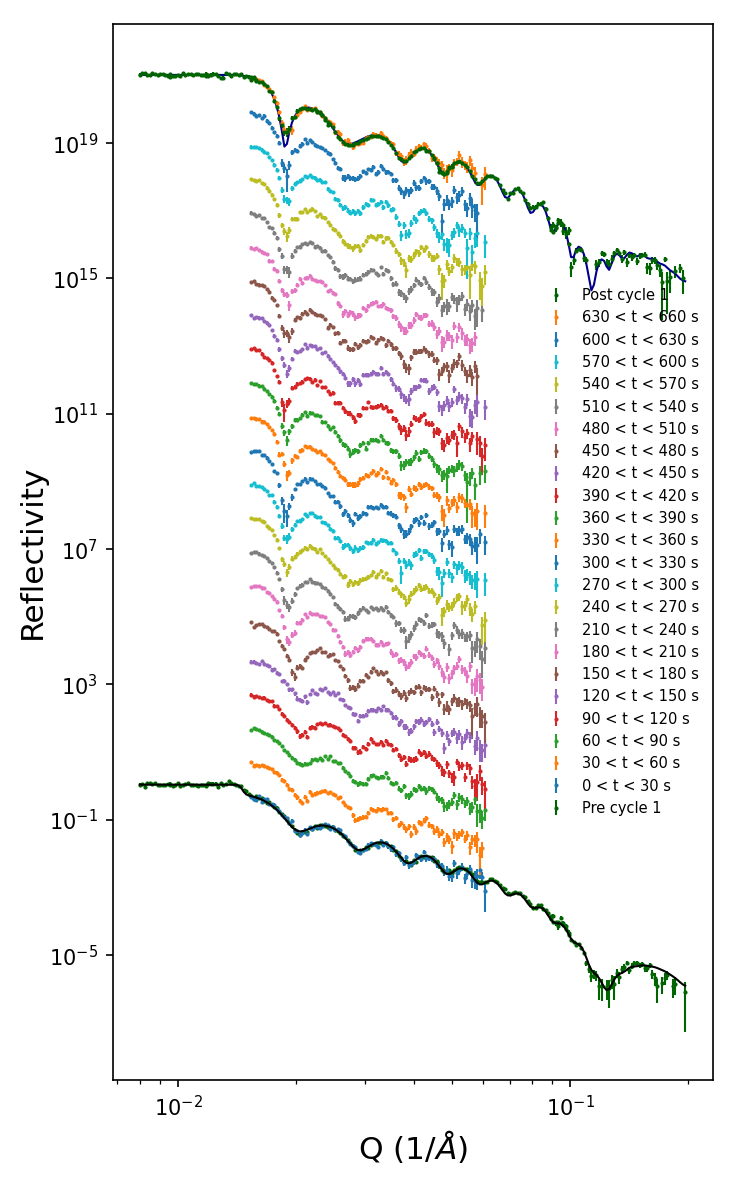

[[0, 'r207168_t000000', 'r207168_t000000'],
 [30, 'r207168_t000030', 'r207168_t000030'],
 [60, 'r207168_t000060', 'r207168_t000060'],
 [90, 'r207168_t000090', 'r207168_t000090'],
 [120, 'r207168_t000120', 'r207168_t000120'],
 [150, 'r207168_t000150', 'r207168_t000150'],
 [180, 'r207168_t000180', 'r207168_t000180'],
 [210, 'r207168_t000210', 'r207168_t000210'],
 [240, 'r207168_t000240', 'r207168_t000240'],
 [270, 'r207168_t000270', 'r207168_t000270'],
 [300, 'r207168_t000300', 'r207168_t000300'],
 [330, 'r207168_t000330', 'r207168_t000330'],
 [360, 'r207168_t000360', 'r207168_t000360'],
 [390, 'r207168_t000390', 'r207168_t000390'],
 [420, 'r207168_t000420', 'r207168_t000420'],
 [450, 'r207168_t000450', 'r207168_t000450'],
 [480, 'r207168_t000480', 'r207168_t000480'],
 [510, 'r207168_t000510', 'r207168_t000510'],
 [540, 'r207168_t000540', 'r207168_t000540'],
 [570, 'r207168_t000570', 'r207168_t000570'],
 [600, 'r207168_t000600', 'r207168_t000600'],
 [630, 'r207168_t000630', 'r207168_t000

In [16]:
from tron.bayesian_analysis import summary_plots
importlib.reload(summary_plots)

initial_state = init_json.replace('expt.json', 'refl.dat')
final_state = final_json.replace('expt.json', 'refl.dat')

summary_plots.plot_dyn_data(dynamic_run, initial_state, final_state,
                            dyn_data_dir=data_dir, dyn_fit_dir=results_dir, model_name='model-loop-tmp', scale=1)
